# <p style="background-color:yellow;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Capstone Project-5 (Hand_Written_Digits)</b></p>


# Hand Written Digits Project

Data reference link : https://datahub.io/machine-learning/pendigits#readme

# Exploratory Data Analysis and Visualization

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 6

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, auc

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [6]:
df = pd.read_csv("pendigits_txt.csv") 
df

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10987,36,100,24,70,0,38,49,33,95,47,87,55,96,21,100,0,4
10988,16,75,41,100,52,64,32,27,0,0,21,9,62,2,100,14,2
10989,56,100,27,79,0,39,12,0,66,15,100,51,93,93,38,93,0
10990,19,100,0,61,3,23,48,0,97,27,100,66,62,97,10,81,0


In [7]:
df[df.input10.isin([47]) & df.input9.isin([74])]

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
1812,17,65,71,80,100,100,81,74,74,47,69,20,31,0,0,2,1
1978,100,99,55,100,22,79,27,51,74,47,87,19,47,0,0,1,5
9855,100,95,70,100,38,84,35,56,74,47,78,17,40,2,0,0,5


In [8]:
df[(df.input10 == 47) & (df.input9 == 74) ]

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
1812,17,65,71,80,100,100,81,74,74,47,69,20,31,0,0,2,1
1978,100,99,55,100,22,79,27,51,74,47,87,19,47,0,0,1,5
9855,100,95,70,100,38,84,35,56,74,47,78,17,40,2,0,0,5


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   input1   10992 non-null  int64
 1   input2   10992 non-null  int64
 2   input3   10992 non-null  int64
 3   input4   10992 non-null  int64
 4   input5   10992 non-null  int64
 5   input6   10992 non-null  int64
 6   input7   10992 non-null  int64
 7   input8   10992 non-null  int64
 8   input9   10992 non-null  int64
 9   input10  10992 non-null  int64
 10  input11  10992 non-null  int64
 11  input12  10992 non-null  int64
 12  input13  10992 non-null  int64
 13  input14  10992 non-null  int64
 14  input15  10992 non-null  int64
 15  input16  10992 non-null  int64
 16  class    10992 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
input1,10992.0,38.814320,34.257783,0.0,6.0,32.0,65.0,100.0
input2,10992.0,85.120269,16.218571,0.0,76.0,89.0,100.0,100.0
input3,10992.0,40.605622,26.342984,0.0,20.0,40.0,58.0,100.0
input4,10992.0,83.774199,19.163646,0.0,72.0,91.0,100.0,100.0
input5,10992.0,49.770378,34.100515,0.0,18.0,53.0,78.0,100.0
input6,10992.0,65.573144,26.996688,0.0,49.0,71.0,86.0,100.0
input7,10992.0,51.220251,30.576881,0.0,28.0,53.5,74.0,100.0
input8,10992.0,44.498999,29.906104,0.0,23.0,43.0,64.0,100.0
input9,10992.0,56.868541,34.135530,0.0,29.0,60.0,89.0,100.0
input10,10992.0,33.695961,27.251548,0.0,7.0,33.0,54.0,100.0


In [11]:
df.duplicated().sum()

0

In [12]:
df.corr()[["class"]]

,class
input1,0.352199
input2,0.232075
input3,0.243030
input4,0.183646
input5,0.039919
input6,0.153520
input7,-0.123090
input8,0.108829
input9,-0.170221
input10,-0.044632


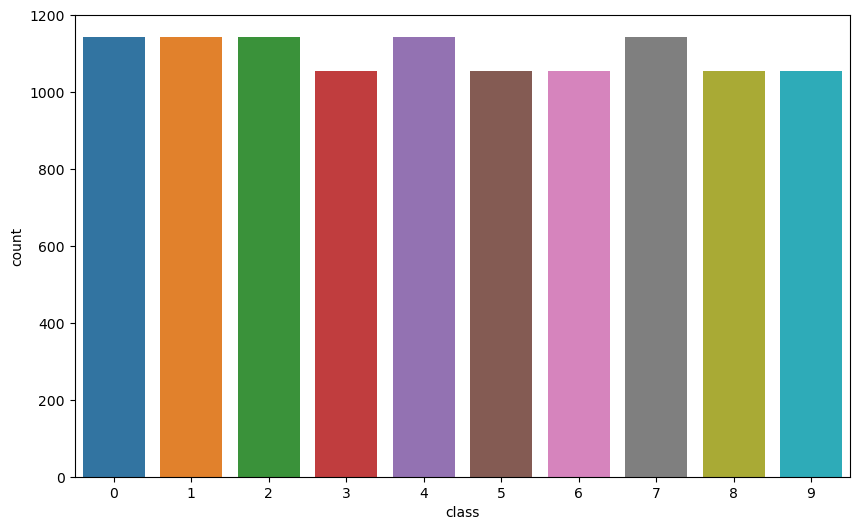

In [13]:
sns.countplot(x="class", data = df);

# Support Vector Machine (SVM) Classifier

In [14]:
X= df.drop(columns="class")
y= df["class"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [16]:
from sklearn.svm import SVC

operations = [("scaler", StandardScaler()), ("svm", SVC())]

svm_pipe = Pipeline(steps=operations)

svm_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC())])

In [17]:
def eval_metric(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [18]:
eval_metric(svm_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[229   0   0   0   0   0   0   0   0   0]
 [  0 221   3   3   0   0   0   2   0   0]
 [  0   1 227   0   0   0   0   1   0   0]
 [  0   0   1 209   0   0   0   1   0   0]
 [  0   0   0   0 229   0   0   0   0   0]
 [  0   0   0   2   0 209   0   0   0   0]
 [  0   0   0   0   0   0 211   0   0   0]
 [  0   0   0   0   0   0   0 228   0   0]
 [  0   0   0   0   0   0   0   0 211   0]
 [  0   1   0   0   0   0   0   1   0 209]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       0.99      0.97      0.98       229
           2       0.98      0.99      0.99       229
           3       0.98      0.99      0.98       211
           4       1.00      1.00      1.00       229
           5       1.00      0.99      1.00       211
           6       1.00      1.00      1.00       211
           7       0.98      1.00      0.99       228
           8       1.00      1.00      1.00       211
           9       

In [19]:
operations = [("scaler", StandardScaler()), ("SVC", SVC())]
svm_pipe = Pipeline(steps=operations)

scores = cross_validate(svm_pipe, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.994769
test_precision         NaN
test_recall            NaN
test_f1                NaN
dtype: float64

In [20]:
svm_pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('SVC', SVC())],
 'verbose': False,
 'scaler': StandardScaler(),
 'SVC': SVC(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'SVC__C': 1.0,
 'SVC__break_ties': False,
 'SVC__cache_size': 200,
 'SVC__class_weight': None,
 'SVC__coef0': 0.0,
 'SVC__decision_function_shape': 'ovr',
 'SVC__degree': 3,
 'SVC__gamma': 'scale',
 'SVC__kernel': 'rbf',
 'SVC__max_iter': -1,
 'SVC__probability': False,
 'SVC__random_state': None,
 'SVC__shrinking': True,
 'SVC__tol': 0.001,
 'SVC__verbose': False}

In [21]:
param_grid = {"SVC__C":[10, 11, 12, 9 ],
             "SVC__gamma":[0.23],
             "SVC__kernel":["rbf", "linear"]}
operations = [("scaler", StandardScaler()), ("SVC", SVC(class_weight="balanced"))]
pipe_model = Pipeline(steps=operations)

svm_model_grid = GridSearchCV(pipe_model, param_grid, scoring='f1_micro', cv=5, n_jobs=-1)

In [22]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC', SVC(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'SVC__C': [10, 11, 12, 9], 'SVC__gamma': [0.23],
                         'SVC__kernel': ['rbf', 'linear']},
             scoring='f1_micro')

In [23]:
svm_model_grid.best_score_

0.9957917060383752

In [24]:
svm_model_grid.best_params_

{'SVC__C': 10, 'SVC__gamma': 0.23, 'SVC__kernel': 'rbf'}

In [25]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[229   0   0   0   0   0   0   0   0   0]
 [  0 226   1   0   0   0   0   1   1   0]
 [  0   1 227   0   0   0   0   1   0   0]
 [  0   0   1 209   0   0   0   1   0   0]
 [  0   0   0   0 229   0   0   0   0   0]
 [  0   0   0   1   0 209   0   0   1   0]
 [  0   0   0   0   0   0 211   0   0   0]
 [  0   0   0   0   0   0   0 228   0   0]
 [  0   0   0   0   0   0   0   0 211   0]
 [  0   1   0   0   0   0   0   0   0 210]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       0.99      0.99      0.99       229
           2       0.99      0.99      0.99       229
           3       1.00      0.99      0.99       211
           4       1.00      1.00      1.00       229
           5       1.00      0.99      1.00       211
           6       1.00      1.00      1.00       211
           7       0.99      1.00      0.99       228
           8       0.99      1.00      1.00       211
           9       

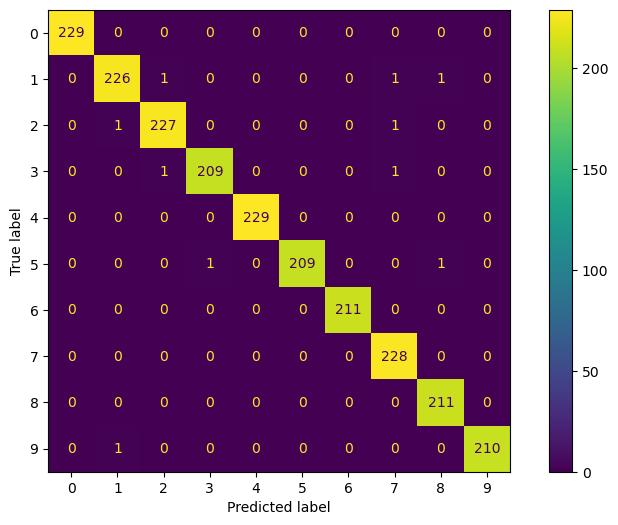

In [26]:
ConfusionMatrixDisplay.from_estimator(svm_model_grid, X_test, y_test);

# Decision Tree (DT) Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(random_state = 42)

In [24]:
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [25]:
y_pred = DT_model.predict(X_test)

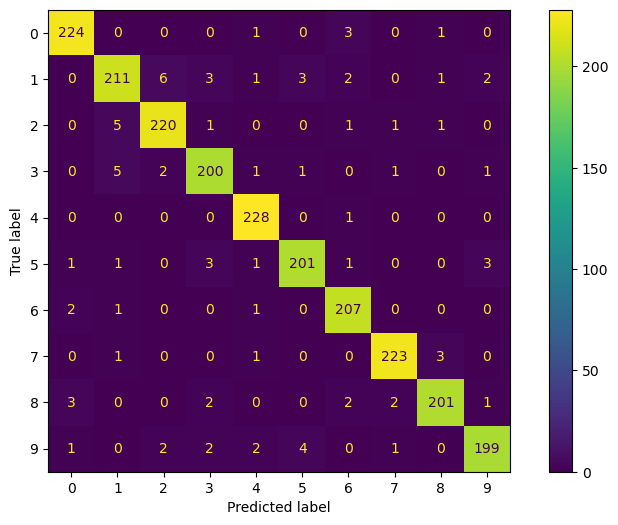

In [26]:
ConfusionMatrixDisplay.from_estimator(DT_model, X_test, y_test);

In [27]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3, 4, 5, 6, 7],
              "max_depth": [None, 2,3, 4, 5],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
              "min_samples_split": [2, 3, 5, 6, 7, 8, 9]}

In [28]:
DT_model_grid = GridSearchCV(estimator=DT_model,
                          param_grid=param_grid,
                          scoring='f1_micro', # (f1 accuracy)
                          cv=10,
                          n_jobs = -1)

In [29]:
DT_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 5],
                         'max_features': [None, 'auto', 'log2', 2, 3, 4, 5, 6,
                                          7],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='f1_micro')

In [30]:
DT_model_grid.best_params_

{'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [31]:
eval_metric(DT_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[224   0   0   0   1   0   3   0   1   0]
 [  0 211   6   3   1   3   2   0   1   2]
 [  0   5 220   1   0   0   1   1   1   0]
 [  0   5   2 200   1   1   0   1   0   1]
 [  0   0   0   0 228   0   1   0   0   0]
 [  1   1   0   3   1 201   1   0   0   3]
 [  2   1   0   0   1   0 207   0   0   0]
 [  0   1   0   0   1   0   0 223   3   0]
 [  3   0   0   2   0   0   2   2 201   1]
 [  1   0   2   2   2   4   0   1   0 199]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       229
           1       0.94      0.92      0.93       229
           2       0.96      0.96      0.96       229
           3       0.95      0.95      0.95       211
           4       0.97      1.00      0.98       229
           5       0.96      0.95      0.96       211
           6       0.95      0.98      0.97       211
           7       0.98      0.98      0.98       228
           8       0.97      0.95      0.96       211
           9       

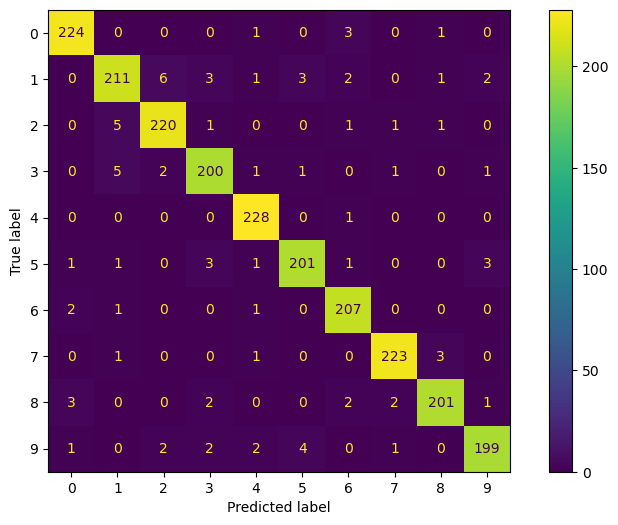

In [32]:
ConfusionMatrixDisplay.from_estimator(DT_model_grid, X_test, y_test);

# Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf_model = RandomForestClassifier(class_weight = "balanced", random_state=101)

In [37]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=101)

In [38]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[228   0   0   0   0   0   0   0   1   0]
 [  0 222   6   1   0   0   0   0   0   0]
 [  0   1 227   0   0   0   0   1   0   0]
 [  0   1   1 208   0   0   0   1   0   0]
 [  0   0   0   0 228   0   0   0   0   1]
 [  0   0   0   1   0 209   0   0   1   0]
 [  0   0   0   0   2   0 209   0   0   0]
 [  0   1   0   0   0   0   0 227   0   0]
 [  0   0   0   0   0   0   0   2 209   0]
 [  0   0   0   0   1   0   0   1   0 209]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       0.99      0.97      0.98       229
           2       0.97      0.99      0.98       229
           3       0.99      0.99      0.99       211
           4       0.99      1.00      0.99       229
           5       1.00      0.99      1.00       211
           6       1.00      0.99      1.00       211
           7       0.98      1.00      0.99       228
           8       0.99      0.99      0.99       211
           9       

In [39]:
model = RandomForestClassifier(class_weight = "balanced", random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

test_accuracy     0.990447
test_precision         NaN
test_recall            NaN
test_f1                NaN
dtype: float64

In [75]:
param_grid = {'n_estimators':[125, 126, 124],   
             'max_features':[3, 4, "auto"],
             'max_depth':[17, 18],
             'min_samples_split':[2] }

model = RandomForestClassifier(class_weight = "balanced", random_state=101)
rf_grid_model = GridSearchCV(model, 
                             param_grid,
                             scoring = "f1_micro",
                             n_jobs = -1,
                             verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [76]:
rf_grid_model.best_params_

{'max_depth': 18,
 'max_features': 4,
 'min_samples_split': 2,
 'n_estimators': 125}

In [77]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[228   0   0   0   0   0   0   0   1   0]
 [  0 222   6   1   0   0   0   0   0   0]
 [  0   1 227   0   0   0   0   1   0   0]
 [  0   1   1 208   0   0   0   1   0   0]
 [  0   0   0   0 228   0   0   0   0   1]
 [  0   0   0   1   0 209   0   0   1   0]
 [  0   0   0   0   2   0 209   0   0   0]
 [  0   0   0   0   0   0   0 228   0   0]
 [  0   0   0   0   0   0   0   2 209   0]
 [  0   0   0   0   1   0   0   1   0 209]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       0.99      0.97      0.98       229
           2       0.97      0.99      0.98       229
           3       0.99      0.99      0.99       211
           4       0.99      1.00      0.99       229
           5       1.00      0.99      1.00       211
           6       1.00      0.99      1.00       211
           7       0.98      1.00      0.99       228
           8       0.99      0.99      0.99       211
           9       

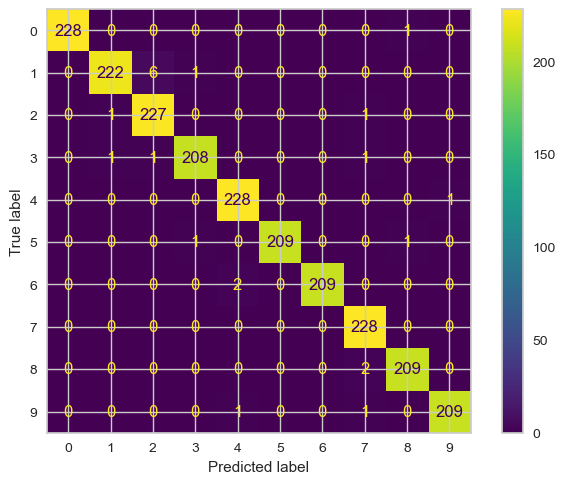

In [78]:
ConfusionMatrixDisplay.from_estimator(rf_grid_model, X_test, y_test);

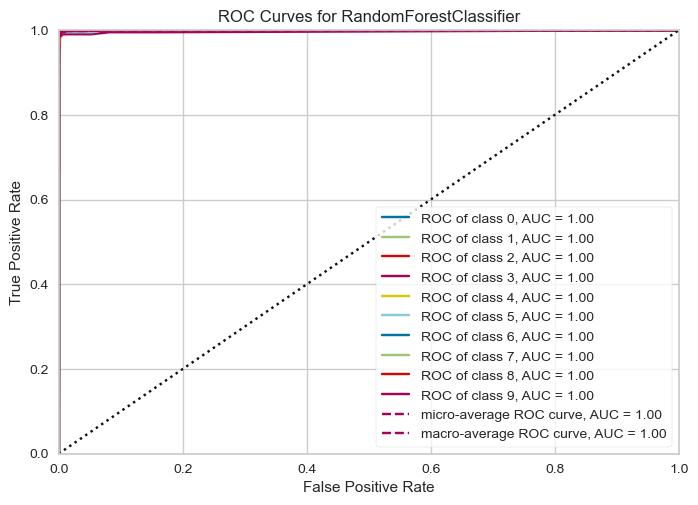

In [79]:
from yellowbrick.classifier import ROCAUC

rf_model = RandomForestClassifier()
visualizer = ROCAUC(rf_model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();   

# Choose the Best Model

# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Congratulations</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Watsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [Linkedin](https://www.linkedin.com/company/techproeducation/mycompany/) |